In [2]:
import os
import sys
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from src.data.data_loader import DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar datos
data_loader = DataLoader()
df = data_loader.load_data()

Buscando config en: d:\Proyectos Personales ML\Fraud detection\config\config.yaml
Ruta de datos: d:\Proyectos Personales ML\Fraud detection\data\raw\data2.csv
Datos cargados exitosamente


In [3]:
# Crear columnas de fecha
df['expiry_year'] = df['Expiry'].str[:2].astype(int)
df['expiry_month'] = df['Expiry'].str[3:].astype(int)

# Preparar datos
X = df[['Profession', 'Income', 'Security_code', 'expiry_year', 'expiry_month']]
y = df['Fraud']

# Codificar y escalar
le = LabelEncoder()
X['Profession'] = le.fit_transform(X['Profession'])

scaler = StandardScaler()
numeric_cols = ['Income', 'Security_code']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

Dimensiones de los datos:
X_train: (8000, 5)
X_test: (2000, 5)


C:\Users\leona\AppData\Local\Temp\ipykernel_9088\358966059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Profession'] = le.fit_transform(X['Profession'])
C:\Users\leona\AppData\Local\Temp\ipykernel_9088\358966059.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [4]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Definir modelos y parámetros
models = {
   'Random Forest': RandomForestClassifier(
       n_estimators=100,
       max_depth=10,
       class_weight='balanced'
   ),
   'XGBoost': XGBClassifier(
       n_estimators=100,
       max_depth=6,
       learning_rate=0.1
   ),
   'SVM': SVC(
       kernel='rbf',
       probability=True
   )
}

# Entrenar modelos y obtener métricas
results = []
for name, model in models.items():
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   
   metrics = {
       'Modelo': name,
       'Accuracy': accuracy_score(y_test, y_pred),
       'Precision': precision_score(y_test, y_pred),
       'Recall': recall_score(y_test, y_pred),
       'F1': f1_score(y_test, y_pred),
       'ROC_AUC': roc_auc_score(y_test, y_pred)
   }
   results.append(metrics)

# Crear DataFrame y ordenar por precisión
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Precision', ascending=False)
print(df_results.round(4))

          Modelo  Accuracy  Precision  Recall      F1  ROC_AUC
2            SVM    0.5095     0.5102  0.5484  0.5286   0.5094
1        XGBoost    0.4865     0.4882  0.4935  0.4908   0.4865
0  Random Forest    0.4775     0.4773  0.4397  0.4577   0.4776


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
def logistic_reg(c_, solver_, multiclass_):
    log_reg_model= LogisticRegression(random_state= 42, solver= solver_, multi_class= multiclass_, n_jobs= -1, C= c_)
    return log_reg_model

In [10]:
model = logistic_reg(1,'saga', 'multinomial')
model.fit(X_train, y_train)
predictions= model.predict(X_test)



print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


[[451 546]
 [424 579]]
0.515


c:\Users\leona\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
multiclass = ['ovr', 'multinomial']
solvers_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
params = []

for i in multiclass:
    for j in solvers_list:
        try:
            # Crear y entrenar el modelo
            model = logistic_reg(1, j, i)
            model.fit(X_train, y_train)

            # Hacer predicciones
            predictions = model.predict(X_test)

            # Guardar parámetros y puntajes
            params.append(f"{i} + {j}")
            accuracy = accuracy_score(y_test, predictions)
            scores.append(accuracy)
        except Exception as e:
            print(f"Error con solver: {j}, multiclass: {i}. Detalles: {e}")

c:\Users\leona\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\leona\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error con solver: liblinear, multiclass: multinomial. Detalles: Solver liblinear does not support a multinomial backend.


c:\Users\leona\anaconda3\envs\fraud_detection\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Params: ['ovr + newton-cg', 'ovr + lbfgs', 'ovr + liblinear', 'ovr + sag', 'ovr + saga', 'multinomial + newton-cg', 'multinomial + lbfgs', 'multinomial + sag', 'multinomial + saga']
Scores: [0.5145, 0.5145, 0.5155, 0.515, 0.5155, 0.5145, 0.5145, 0.5145, 0.515]


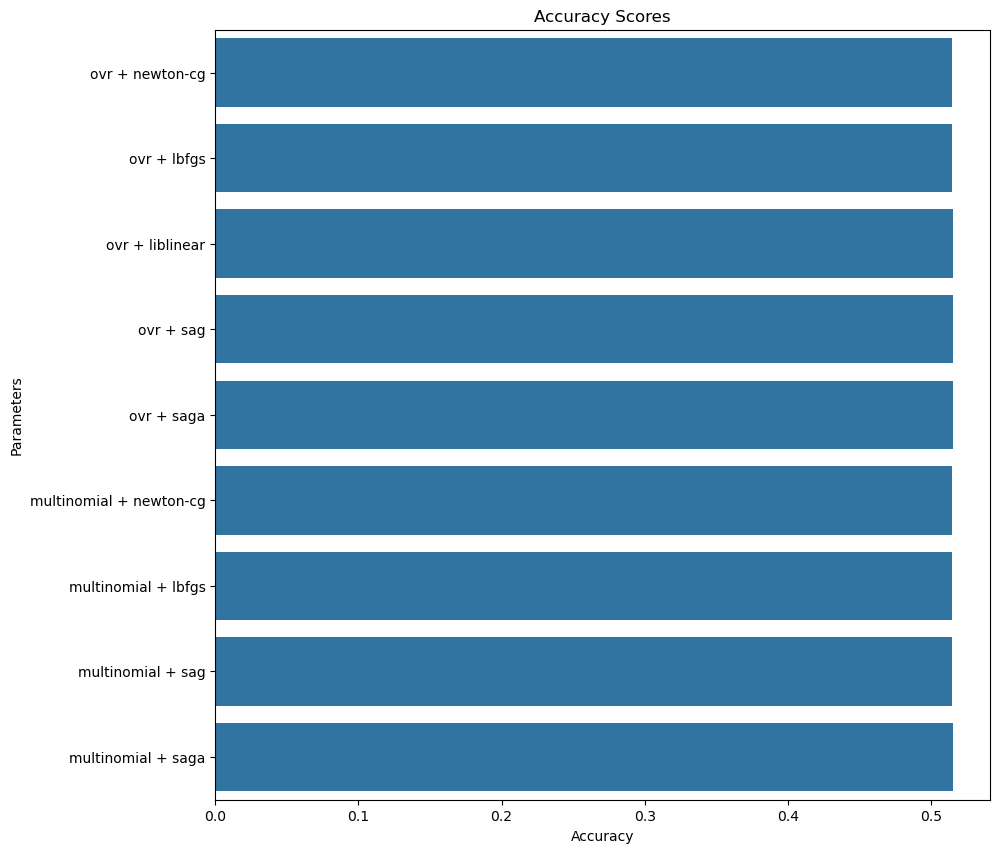

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Verificar resultados
print("Params:", params)
print("Scores:", scores)


plt.figure(figsize=(10, 10))
sns.barplot(x=scores, y=params).set_title('Accuracy Scores')
plt.xlabel("Accuracy")
plt.ylabel("Parameters")
plt.show()